<a href="https://colab.research.google.com/github/SeoinJoshuaKim/SeoinJoshuaKim.github.io/blob/master/n233-feature-importances/n233a_feature_importances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 3 / NOTE 3*

# 📝 Assignment
---
# Feature Importances

### 1) 지속적으로 포트폴리오 프로젝트를 수행하세요
- 지속적으로 데이터를 랭글링 하고 추가적인 시각화 결과를 만드세요
- 작성한 코드마다 적절한 코멘트를 추가하세요
- 모델을 학습시키고 베이스라인 모델과 비교해 보세요
- **(Urclass Quiz) 본인의 프로젝트의 베이스라인 모델이 무엇인지 한 문장으로 설명해 보세요.** 

In [ ]:
# 패키지 로딩 데이터 불러오기

import pandas as pd
import numpy as np

df1 = pd.read_csv("D:/수업/codestates/Section 2/section 23x 샘플 데이터/BankChurners.csv")

In [ ]:
# 테이블 확인

df1

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [ ]:
#base model: Mode로 신용카드 고객 이탈률 16.06%

df1['Attrition_Flag'].value_counts(normalize=True)
df1['Attrition_Flag'] = np.where(df1['Attrition_Flag']=='Existing Customer',0,1)


### 2) Xgboost를 사용해 학습하고 기존 모델과 비교해 보세요.
- 본인 포트폴리오 데이터를 Xgboost로 학습하여 기존에 만들었던 모델과 비교해 봅니다. 성능은 더 좋아질수도 아닐수도 있습니다. 
- **(Urclass Quiz) breast cancer 데이터를 Xgboost로 학습하고 f1 score를 제출하세요.(test 데이터에서 0.95이상)**

In [ ]:
### (본인 포트폴리오 과제) 이곳에서 과제를 진행해 주세요 ### 


#패키지 로드

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer 

#독립 종속 변수 지정

my_target = 'Attrition_Flag'
my_features = df1.columns.drop(my_target)

df1_target = df1[my_target]
df1_features = df1[my_features]

#훈련, 검증 데이터 세트 지정

X_train1, X_test1, y_train1, y_test1 = train_test_split(df1_features, df1_target, test_size=0.2, random_state=2)
print(X_train1.shape, X_test1.shape)

(8101, 22) (2026, 22)


In [ ]:
my_target

'Attrition_Flag'

In [ ]:
my_features



Index(['CLIENTNUM', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [ ]:
df1_target

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Attrition_Flag, Length: 10127, dtype: int32

In [ ]:
df1_features

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,44,F,1,High School,Married,Less than $40K,Blue,36,5,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [ ]:
#XG모델로 randomforest 모델 수행할 pipe1 구축

from xgboost import XGBClassifier
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

pipe1 = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    XGBClassifier(n_estimators=200
                  , random_state=2
                  , n_jobs=-1
                  , max_depth=7
                  , learning_rate=0.2
                 )
)

pipe1.fit(X_train1, y_train1);

In [ ]:
pipe1

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Gender', 'Education_Level',
                                      'Marital_Status', 'Income_Category',
                                      'Card_Category'],
                                mapping=[{'col': 'Gender',
                                          'data_type': dtype('O'),
                                          'mapping': M      1
F      2
NaN   -2
dtype: int64},
                                         {'col': 'Education_Level',
                                          'data_type': dtype('O'),
                                          'mapping': Post-Graduate    1
Graduate         2
Unknown          3
Uneducated       4
High School      5
College          6
Doctorate        7
NaN             -2
dt...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rat

In [ ]:
#정확도가 이상하게 나와서 확인해야 될 것 같음.

from sklearn.metrics import classification_report

pipe1.fit(X_train1, y_train1)
print('검증 정확도', pipe1.score(X_test1, y_test1))

print(classification_report(y_test1, pipe1.predict(X_test1)))

검증 정확도 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1714
           1       1.00      1.00      1.00       312

    accuracy                           1.00      2026
   macro avg       1.00      1.00      1.00      2026
weighted avg       1.00      1.00      1.00      2026



In [ ]:
### (Urclass Quiz) 이곳에서 과제를 진행해 주세요 ###

#패키지 로드

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer 

cancer_dataset = load_breast_cancer()

#종속, 독립 변수 지정

features = cancer_dataset.data
target = cancer_dataset.target
df = pd.DataFrame(data=features, columns=cancer_dataset.feature_names)
df['target'] = target
features=df.drop('target', axis=1)

#훈련, 검증 데이터 지정

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=2)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [ ]:
!pip install xgboost

     ------------------------------------- 125.4/125.4 MB 13.1 MB/s eta 0:00:00


In [ ]:
#XG모델로 randomforest 모델 수행할 pipe 구축

from xgboost import XGBClassifier
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    XGBClassifier(n_estimators=200
                  , random_state=2
                  , n_jobs=-1
                  , max_depth=7
                  , learning_rate=0.2
                 )
)

pipe.fit(X_train, y_train);

In [ ]:
pipe

Pipeline(steps=[('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('simpleimputer', SimpleImputer(strategy='median')),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.2, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=7, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=200, n_jobs=-1, num_parallel_tree=

In [ ]:
#검증 정확도 산출

from sklearn.metrics import classification_report

pipe.fit(X_train, y_train)
print('검증 정확도', pipe.score(X_test, y_test))

print(classification_report(y_test, pipe.predict(X_test)))

검증 정확도 0.956140350877193
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        45
           1       0.97      0.96      0.96        69

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



### 3) Permutation importances를 계산하고 다른 중요도 결과와 비교해 보세요
- 본인 포트폴리오 데이터를 사용해 만든 모델의 Permutation importances를 계산해 보세요.
- **(Urclass Quiz) breast cancer 데이터를 사용해 만든 모델의 Permutation importances를 계산하고 가장 높은 값을 가지는 특성의 이름을 제출하세요.**
    - eli5 PermutationImportance 사용
    - scoring = 'accuracy'
    - n_iter = 5
    - random_state = 2

In [ ]:
### (본인 포트폴리오 과제) 이곳에서 과제를 진행해 주세요 ### 

In [ ]:
!pip install eli5

     ------------------------------------- 216.2/216.2 kB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 133.1/133.1 kB ? eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB 2.3 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=d9d9df9ed6afd22204a7e41d82daed47438b06bf08d1dfabd5134ce81b61718e
  Stored in directory: c:\users\kim\appdata\local\pip\cache\wheels\7b\26\a5\8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.10.2 requires ruamel-yaml, which is not installed.
jupyter-server 1.13.5 requires pywinpty<2; os_name == "nt", but you have pywinpty 2.0.2 which is incompatible.


In [ ]:
X_train.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [ ]:
# 파이프 라인 스텝 확인

pipe.named_steps

{'ordinalencoder': OrdinalEncoder(cols=[], mapping=[]),
 'simpleimputer': SimpleImputer(strategy='median'),
 'xgbclassifier': XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='',
               learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
               max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
               missing=nan, monotone_constraints='()', n_estimators=200,
               n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=2,
               reg_alpha=0, reg_lambda=1, ...)}

[]

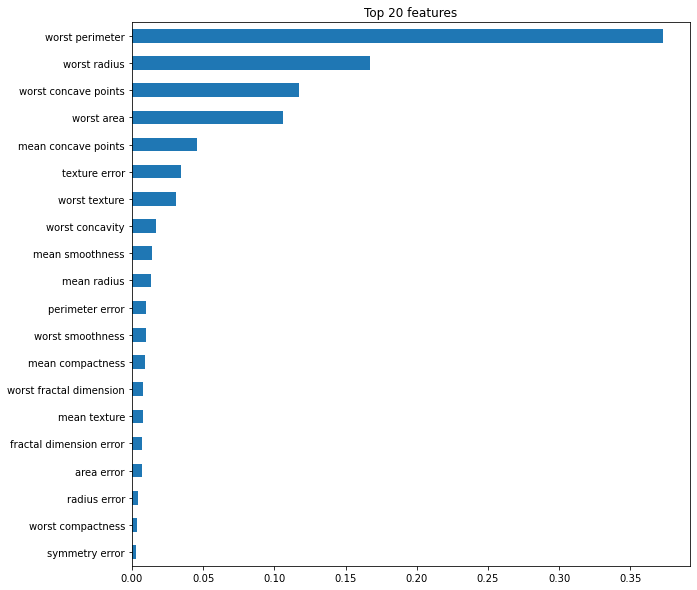

In [ ]:
# 특성 중요도

rf = pipe.named_steps['xgbclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

%matplotlib inline
import matplotlib.pyplot as plt

# 특성 중요도 그래프 출력

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh()
plt.plot()

In [ ]:
### (Urclass Quiz) 이곳에서 과제를 진행해 주세요 ###

import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의

permuter = PermutationImportance(
    pipe.named_steps['xgbclassifier'], # model
    scoring='accuracy', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)


# 모델 적용

permuter.fit(X_test, y_test);

In [ ]:
feature_names = X_test.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

mean radius                0.000000
worst compactness          0.000000
concave points error       0.000000
concavity error            0.000000
mean fractal dimension     0.000000
mean concavity             0.000000
smoothness error           0.000000
mean area                  0.000000
mean perimeter             0.000000
fractal dimension error    0.003509
mean compactness           0.005263
radius error               0.005263
mean texture               0.005263
worst concavity            0.008772
worst fractal dimension    0.008772
mean symmetry              0.010526
worst radius               0.012281
area error                 0.012281
worst symmetry             0.012281
symmetry error             0.014035
perimeter error            0.015789
worst concave points       0.015789
worst area                 0.017544
worst smoothness           0.017544
texture error              0.017544
worst perimeter            0.019298
mean concave points        0.019298
compactness error          0

In [ ]:
# 특성별 score 확인

eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

Weight,Feature
0.0351 ± 0.0222,mean smoothness
0.0351 ± 0.0111,worst texture
0.0211 ± 0.0140,compactness error
0.0193 ± 0.0131,mean concave points
0.0193 ± 0.0131,worst perimeter
0.0175 ± 0.0111,texture error
0.0175 ± 0.0111,worst smoothness
0.0175 ± 0.0400,worst area
0.0158 ± 0.0233,worst concave points
0.0158 ± 0.0131,perimeter error


## 🔥 도전과제(Github - Discussion)

### 1. 특성 중요도를 계산하는 방법의 장단점을 설명하고 각각 어떤 상황에 사용하면 좋을지 설명해 보세요

### 2. bagging과 boosting의 차이점과 각각 어떤 알고리즘 종류들이 있는지 알고리즘별 장단점을 설명하고, 어떤 상황에서 사용하면 좋을지 논의해 보세요.


In [ ]:
'''
배깅
병렬로 학습
학습 속도가 빠르고 적은 데이터만으로도 준수한 일반화 성능을 얻을 수 있음
랜덤추출을 통해서 트리를 만들기때문에 서로 트리간에 상화관계 즉 독립적
각각의 트리를 균등한 비중으로 앙상블 하여 최종 결과를 도출해서 학습 속도가 빠름

부스팅
순차적으로 학습
배깅에 비해 학습 속도가 느리지만 에러가 적고 강력한 성능이 가능하며 오버피팅을 조심해야함
이전트리의 에러가중치에 영향을 받기에 트리간에 상관관계가 있다
성능이 좋은 트리에 가중치를 주어 앙상블 해서 최종 결과를 도출하기 때문에 학습 속도가 느리지만 좋은 성능을 얻을 수 있지만 오버피팅을 조심해야 함

'''